<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-VGG-RandDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Debug Refactoring  VGG11 Model







In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [3]:
import sys
if 'google.colab' in sys.modules:
    !pip install weightwatcher

In [4]:
import logging

import weightwatcher as ww
import torchvision.models as models

logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.DEBUG)

ww.__version__

PyTorch is available but CUDA is not. Defaulting to scipy for SVD


'0.6.4.3'

In [5]:
modelname = 'VGG11'
model = models.vgg11(pretrained=True)
watcher = ww.WeightWatcher(model=model)

INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.22.3
torch version 1.12.1
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.22.3
torch version 1.12.1


In [6]:
model = models.vgg11(weights='VGG11_Weights.IMAGENET1K_V1').state_dict()
watcher = ww.WeightWatcher(model=model, log_level=logging.DEBUG)

INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.22.3
torch version 1.12.1
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.22.3
torch version 1.12.1


#### IDK why the ints are floats

In [7]:
details =  watcher.describe(model=model)
details

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'f

,layer_id,name,M,N,Q,layer_type,longname,num_evals,rf
0,1,features.0,3,64,21.333333,LAYER_TYPE.CONV2D,features.0,27,9
1,2,features.3,64,128,2.000000,LAYER_TYPE.CONV2D,features.3,576,9
2,3,features.6,128,256,2.000000,LAYER_TYPE.CONV2D,features.6,1152,9
3,4,features.8,256,256,1.000000,LAYER_TYPE.CONV2D,features.8,2304,9
4,5,features.11,256,512,2.000000,LAYER_TYPE.CONV2D,features.11,2304,9
5,6,features.13,512,512,1.000000,LAYER_TYPE.CONV2D,features.13,4608,9
6,7,features.16,512,512,1.000000,LAYER_TYPE.CONV2D,features.16,4608,9
7,8,features.18,512,512,1.000000,LAYER_TYPE.CONV2D,features.18,4608,9
8,9,classifier.0,4096,25088,6.125000,LAYER_TYPE.DENSE,classifier.0,4096,1
9,10,classifier.3,4096,4096,1.000000,LAYER_TYPE.DENSE,classifier.3,4096,1


In [8]:
fc2_layer = details.layer_id.to_numpy()[-2]
fc2_layer

10

In [9]:
esd_b4 = watcher.get_ESD(layer=fc2_layer)
len(esd_b4)

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'f

DEBUG:weightwatcher:keeping layer 10 classifier.3 by id
DEBUG:weightwatcher:layer_supported  N 4096 max evals 10000
INFO:weightwatcher:Getting ESD for layer 10 ; ww_layer id = 10
DEBUG:weightwatcher:apply ESD  on Layer 10 classifier.3 
DEBUG:weightwatcher:running SVD on Layer 10 classifier.3 
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': True, 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False} 
DEBUG:weightwatcher:Running accurate SVD:  W.shape=(4096, 4096)  n_comp = 4096


FILTER 10


DEBUG:weightwatcher:Found 4096 eiganvalues for 10 classifier.3


4096

In [10]:
watcher.SVDSmoothing(layers=[fc2_layer])

INFO:weightwatcher: Smoothing method svd
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': True, 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': 'svd', 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'fit': 'PL', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'layers': [10]}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': True, 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': 'svd', 'stacked': False, 'svd_method': 'accurate', 'fix_fingers

FILTER 10


DEBUG:weightwatcher:smoothed W (4096, 4096) -> (4096, 4096) n_comp=819
DEBUG:weightwatcher:skipping layer 11 classifier.6 by id
DEBUG:weightwatcher:layer_supported  N 4096 max evals 10000
DEBUG:weightwatcher:Layer 11 classifier.6 is skipped
INFO:weightwatcher:Returning smoothed model


In [11]:
esd_aftr = watcher.get_ESD(layer=fc2_layer) 

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'f

DEBUG:weightwatcher:keeping layer 10 classifier.3 by id
DEBUG:weightwatcher:layer_supported  N 4096 max evals 10000
INFO:weightwatcher:Getting ESD for layer 10 ; ww_layer id = 10
DEBUG:weightwatcher:apply ESD  on Layer 10 classifier.3 
DEBUG:weightwatcher:running SVD on Layer 10 classifier.3 
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': True, 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'accurate', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False} 
DEBUG:weightwatcher:Running accurate SVD:  W.shape=(4096, 4096)  n_comp = 4096


FILTER 10


DEBUG:weightwatcher:Found 4096 eiganvalues for 10 classifier.3


In [12]:
len(esd_b4)

4096

In [13]:
len(esd_b4[esd_b4>10**-10]), len(esd_aftr[esd_aftr>10**-10])

(4096, 819)

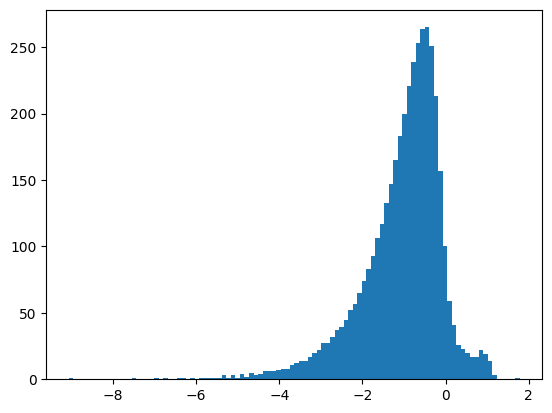

In [14]:
plt.hist(np.log10(esd_b4), bins=100);

In [15]:
np.min(esd_b4)

8.567443007721141e-10